In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the required libraries

In [ ]:
!python -m spacy download en_core_web_lg
!python -m spacy download en_core_web_sm
!python -m spacy download en
import nltk
nltk.download('all')

     |████████████████████████████████| 827.9 MB 1.4 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=add4ef302c1263dce25f0a50e90187aa6c6b95c7e6389f3dd4f184567c99e6da
  Stored in directory: /tmp/pip-ephem-wheel-cache-lm1g12li/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')
     |████████████████████████████████| 12.0 MB 5.3 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
     |████████████████████████████████| 12.0 MB 5.0 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
[nltk_data] Downlo

False

In [ ]:
from sklearn.decomposition import PCA

import sklearn
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer


from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import nltk
import pandas as pd
import spacy
import numpy as np

import itertools
import collections
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS


nlp = spacy.load('en_core_web_lg')
import re
from ast import literal_eval

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/NLP_attempt2/imdb_scraped.csv")

In [ ]:
df.head()

,title,description,rating,popularity
0,Uncle Tom's Cabin,Geo. Shelby is forced to sell his faithful old...,5.4,NaN
1,The Undesirable,"Betty (Lili Berky, Duel For Nothing), a young ...",6.2,NaN
2,Cinderella,Based on the fairy tale: Cinderella is mistrea...,6.0,NaN
3,The Regeneration,"At 10 years old, Owens becomes a ragged orphan...",6.9,NaN
4,The Golem,"In this version of the golem legend, the golem...",6.8,NaN


In [ ]:
#import contractions list and remove it in the next step

contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are",
"thx"   : "thanks"
}

def remove_contractions(text):
    return contractions[text.lower()] if text.lower() in contractions.keys() else text

# clean dataset
def clean_dataset(text):
    # To lowercase
    text = text.lower()
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove tickers
    text = re.sub(r'\$\w*', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)
    # Remove whitespace (including new line characters)
    text = re.sub(r'\s\s+','', text)
    text = re.sub(r'[ ]{2, }',' ',text)
    # Remove URL, RT, mention(@)
    text=  re.sub(r'http(\S)+', '',text)
    text=  re.sub(r'http ...', '',text)
    text=  re.sub(r'(RT|rt)[ ]*@[ ]*[\S]+','',text)
    text=  re.sub(r'RT[ ]?@','',text)
    text = re.sub(r'@[\S]+','',text)
    # Remove words with 2 or fewer letters
    text = re.sub(r'\b\w{1,2}\b', '', text)
    #&, < and >
    text = re.sub(r'&amp;?', 'and',text)
    text = re.sub(r'&lt;','<',text)
    text = re.sub(r'&gt;','>',text)
    # Insert space between words and punctuation marks
    text = re.sub(r'([\w\d]+)([^\w\d ]+)', '\1 \2',text)
    text = re.sub(r'([^\w\d ]+)([\w\d]+)', '\1 \2',text)
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    text = text.strip()
    # Remove misspelling words
    text = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))
    # Remove punctuation
    text = ' '.join(re.sub("[\.\,\!\?\:\;\-\=\/\|\'\(\']", " ", text).split())
    # Remove emoji
    #text = emoji.demojize(text)
    text = text.replace(":"," ")
    text = ' '.join(text.split()) 
    text = re.sub("([^\x00-\x7F])+"," ",text)
    # Remove Mojibake (also extra spaces)
    text = ' '.join(re.sub("[^\u4e00-\u9fa5\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    return text

#remove stop word i.e. the most frequently appeared words 

myOwnStopList=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'what','how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'do', 'should', "should", 'now', 'd', 'm', 'o', 're', 've', 'y', 'ain', "are", 'could', "was",
'would','have','get','got','getting','one','two','still','going']


In [ ]:
df['description']=df['description'].apply(lambda x: remove_contractions(str(x)))

df['description'] =df['description'].apply(lambda x: clean_dataset(x))
df['description'] = df['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (myOwnStopList)]))

#dropping popularity field, as we would fine-tune the ratings fiels
df.drop(['popularity'],axis=1,inplace=True)

In [ ]:
#fine-tuning the rating in accordance to our requirement to convert into a two variable problem
df['rating'] = df['rating'].apply(lambda x: 1 if x>6.5 else 0)

In [ ]:
df['rating'].value_counts()

0    18407
1    11593
Name: rating, dtype: int64

Fetching relevant fields

In [ ]:
filtered_df2=df[['description','rating']]

Sentence transformers for generating BERT embeddings of plot passages

In [ ]:
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer



     |████████████████████████████████| 78 kB 3.4 MB/s 
     |████████████████████████████████| 3.1 MB 11.1 MB/s 
     |████████████████████████████████| 3.3 MB 38.9 MB/s 
     |████████████████████████████████| 1.2 MB 24.7 MB/s 
     |████████████████████████████████| 61 kB 495 kB/s 
     |████████████████████████████████| 596 kB 40.5 MB/s 
     |████████████████████████████████| 895 kB 42.9 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=987e68da476b0d8b83ad018b51b167a467d424e42b8f937cf30296b2d902a340
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Importing the distillbert module

In [ ]:
model = SentenceTransformer('sentence-transformers/all-distilroberta-v1')

Downloading:   0%|          | 0.00/737 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.86k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/653 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/15.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/329M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/333 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Encoding passages into corresponding embeddings

In [ ]:
filtered_df2['sentence_embedding']=filtered_df2['description'].apply(lambda x: model.encode(x))

SVO extraction : PROPN->VERB->PROPN/NOUN extraction using pos tagging

In [ ]:
nlp2 = spacy.load("en_core_web_sm")
svo_pos=['PROPN','VERB','NOUN']

def svo_extract(text):
  doc=nlp2(text)
  result=""
  flag_propn=False
  flag_verb=False
  for token in doc:
    if(token.pos_ in svo_pos):
      if token.pos_=='NOUN':
        if(flag_propn and flag_verb):
          result+=" "+token.text
          flag_propn=False
          flag_verb=False
        else:
          continue
        
      if token.pos_=='PROPN':
        flag_propn=True
        result+=" "+token.text
        
      if token.pos_=='VERB':
        flag_verb=True
        result+=" "+token.text
  return result

Fetching embeddings for SVO extraction

In [ ]:
filtered_df2['svo_embedding']=filtered_df2['description'].apply(lambda x: model.encode(svo_extract(x)))

Extracting the relevant feature vectors for passing it to further layers

In [ ]:
column_list_embedding=["embedding"+str(i) for i in range(768)]
column_list_svo=['svo'+str(i) for i in range(768)]

filtered_df2[column_list_embedding]=pd.DataFrame(filtered_df2.sentence_embedding.values.tolist(), index= filtered_df2.index)

filtered_df2[column_list_svo]=pd.DataFrame(filtered_df2.svo_embedding.values.tolist(), index= filtered_df2.index)



Saving embeddings to csv for future purpose

In [ ]:
filtered_df2.to_csv("/content/drive/MyDrive/NLP_attempt_11262021/joint_embeddings_distilbert_converted.csv",encoding='utf8',index=False)

In [ ]:
#filtered_df.shape
filtered_df2.shape

(30000, 1540)

In [ ]:
filtered_df2.head()

,description,rating,sentence_embedding,svo_embedding,embedding0,embedding1,embedding2,embedding3,embedding4,embedding5,embedding6,embedding7,embedding8,embedding9,embedding10,embedding11,embedding12,embedding13,embedding14,embedding15,embedding16,embedding17,embedding18,embedding19,embedding20,embedding21,embedding22,embedding23,embedding24,embedding25,embedding26,embedding27,embedding28,embedding29,embedding30,embedding31,embedding32,embedding33,embedding34,embedding35,...,svo728,svo729,svo730,svo731,svo732,svo733,svo734,svo735,svo736,svo737,svo738,svo739,svo740,svo741,svo742,svo743,svo744,svo745,svo746,svo747,svo748,svo749,svo750,svo751,svo752,svo753,svo754,svo755,svo756,svo757,svo758,svo759,svo760,svo761,svo762,svo763,svo764,svo765,svo766,svo767
0,shelby forced sell faithful old infant son eli...,0,"[0.0059777214, -0.031746365, 0.0050008264, -0....","[-0.0017690682, -0.044996135, 0.007718736, -0....",0.005978,-0.031746,0.005001,-0.035092,0.057830,0.047939,0.007169,0.014345,0.010331,0.054085,0.022999,-0.001807,0.023649,0.023887,-0.030713,0.002164,0.013827,0.013859,0.009122,0.017608,0.024764,0.013523,0.014775,0.044564,0.030125,0.021542,0.024617,0.030165,-0.044718,-0.014532,0.067231,-0.014584,0.008372,0.011483,-0.069421,-0.002897,...,-0.003994,0.081246,0.028228,0.045435,0.007212,0.016210,0.077537,0.006329,-0.007748,0.001022,-0.021723,-0.030679,0.003923,-0.078616,-0.016560,-0.079005,0.001675,0.037294,0.019795,-0.074067,0.014118,-0.008488,0.051910,0.041088,-0.078425,0.016909,-0.037251,0.013215,-0.046728,-0.015390,-0.009806,-0.043632,-0.011659,0.004445,0.041147,0.015788,-0.004268,-0.021915,0.013871,0.030823
1,betty duel young woman living told dying fathe...,0,"[-0.0074597457, -0.00028851134, 0.029130261, 0...","[0.007845081, -0.01993518, 0.042860717, 0.0196...",-0.007460,-0.000289,0.029130,0.024708,0.017985,0.025363,0.052971,0.009545,-0.023274,0.036384,-0.008121,0.031582,-0.002082,0.081070,-0.069658,-0.049789,0.042343,0.038949,0.008707,0.055761,0.051733,0.006284,-0.006809,0.057190,-0.015444,-0.006609,-0.012111,-0.007749,0.007024,-0.038027,0.017395,-0.021208,0.004834,-0.041688,-0.056705,0.003056,...,-0.055592,0.028067,-0.019616,0.033615,0.003688,0.047667,0.060073,0.001765,0.064202,-0.010025,-0.038553,0.009188,0.019571,-0.039137,0.011889,-0.017777,0.026045,0.067629,0.012666,-0.054863,0.049934,0.016330,-0.009542,0.057271,-0.036605,-0.014116,0.030923,-0.033314,-0.071296,-0.013298,-0.039078,-0.019263,0.005639,-0.003882,-0.015695,-0.027081,0.004302,-0.047885,0.014535,0.031776
2,based fairy cinderella mistreated stepmother f...,0,"[-0.0012450048, -0.0015358995, 0.050026853, -0...","[-0.014239883, -0.026658036, 0.03396105, -0.01...",-0.001245,-0.001536,0.050027,-0.005587,0.081252,-0.022442,0.014461,0.046101,0.071028,0.047897,-0.001979,-0.062753,0.027686,-0.021402,-0.036999,0.023154,-0.046029,0.014752,-0.001336,-0.053886,0.004453,0.025661,-0.037734,0.030860,-0.040463,0.008481,-0.038822,0.009006,-0.015115,-0.016205,0.000264,0.008990,0.027860,0.030859,-0.007253,-0.007026,...,0.023287,0.020405,0.022400,-0.010192,0.039040,0.116360,0.076598,0.085683,0.012547,0.029624,-0.014558,0.011918,-0.030448,-0.036961,0.046729,-0.057206,0.046324,0.031375,-0.010728,-0.018646,0.034346,-0.007645,-0.004724,0.041493,-0.064992,0.061693,-0.007083,-0.017953,-0.010126,0.028327,-0.041831,0.004423,-0.000478,-0.026795,0.017336,-0.026359,0.017385,0.017259,-0.032750,-0.019815
3,years owens becomes ragged orphan sainted moth...,1,"[-0.008932431, -0.010898057, -0.013182628, -0....","[0.010845151, -0.017057894, -0.004645146, -0.0...",-0.008932,-0.010898,-0.013183,-0.005706,0.026228,0.059411,0.010314,0.005580,0.002445,0.046280,0.023161,-0.038364,0.014295,-0.004621,0.037958,-0.008976,0.012649,-0.038415,0.010589,0.076872,0.030208,-0.006668,0.014680,0.020619,0.015313,0.018715,-0.035287,-0.001436,-0.006370,-0.051055,0.048415,-0.014770,0.036006,-0.001845,-0.006524,0.041149,...,0.023110,-0.002140,0.013362,0.002480,0.054517,0.004322,0.058437,0.022389,0.009931,0.002367,0.006981,-0

In [ ]:
check=pd.read_csv("/content/drive/MyDrive/NLP_attempt_11262021/joint_embeddings_distilbert_converted.csv")

In [ ]:
check.head()

,description,rating,sentence_embedding,svo_embedding,embedding0,embedding1,embedding2,embedding3,embedding4,embedding5,embedding6,embedding7,embedding8,embedding9,embedding10,embedding11,embedding12,embedding13,embedding14,embedding15,embedding16,embedding17,embedding18,embedding19,embedding20,embedding21,embedding22,embedding23,embedding24,embedding25,embedding26,embedding27,embedding28,embedding29,embedding30,embedding31,embedding32,embedding33,embedding34,embedding35,...,svo728,svo729,svo730,svo731,svo732,svo733,svo734,svo735,svo736,svo737,svo738,svo739,svo740,svo741,svo742,svo743,svo744,svo745,svo746,svo747,svo748,svo749,svo750,svo751,svo752,svo753,svo754,svo755,svo756,svo757,svo758,svo759,svo760,svo761,svo762,svo763,svo764,svo765,svo766,svo767
0,shelby forced sell faithful old infant son eli...,0,[ 5.97772142e-03 -3.17463651e-02 5.00082644e-...,[-1.76906819e-03 -4.49961349e-02 7.71873584e-...,0.005978,-0.031746,0.005001,-0.035092,0.057830,0.047939,0.007169,0.014345,0.010331,0.054085,0.022999,-0.001807,0.023649,0.023887,-0.030713,0.002164,0.013827,0.013859,0.009122,0.017608,0.024764,0.013523,0.014775,0.044564,0.030125,0.021542,0.024617,0.030165,-0.044718,-0.014532,0.067231,-0.014584,0.008372,0.011483,-0.069421,-0.002897,...,-0.003994,0.081246,0.028228,0.045435,0.007212,0.016210,0.077537,0.006329,-0.007748,0.001022,-0.021723,-0.030679,0.003923,-0.078616,-0.016560,-0.079005,0.001675,0.037294,0.019795,-0.074067,0.014118,-0.008488,0.051910,0.041088,-0.078425,0.016909,-0.037251,0.013215,-0.046728,-0.015390,-0.009806,-0.043632,-0.011659,0.004445,0.041147,0.015788,-0.004268,-0.021915,0.013871,0.030823
1,betty duel young woman living told dying fathe...,0,[-7.45974574e-03 -2.88511335e-04 2.91302614e-...,[ 7.84508139e-03 -1.99351795e-02 4.28607166e-...,-0.007460,-0.000289,0.029130,0.024708,0.017985,0.025363,0.052971,0.009545,-0.023274,0.036384,-0.008121,0.031582,-0.002082,0.081070,-0.069658,-0.049789,0.042343,0.038949,0.008707,0.055761,0.051733,0.006284,-0.006809,0.057190,-0.015444,-0.006609,-0.012111,-0.007749,0.007024,-0.038027,0.017395,-0.021208,0.004834,-0.041688,-0.056705,0.003056,...,-0.055592,0.028067,-0.019616,0.033615,0.003688,0.047667,0.060073,0.001765,0.064202,-0.010025,-0.038553,0.009188,0.019571,-0.039137,0.011889,-0.017777,0.026045,0.067629,0.012666,-0.054863,0.049934,0.016330,-0.009542,0.057271,-0.036605,-0.014116,0.030923,-0.033314,-0.071296,-0.013298,-0.039078,-0.019263,0.005639,-0.003882,-0.015695,-0.027081,0.004302,-0.047885,0.014535,0.031776
2,based fairy cinderella mistreated stepmother f...,0,[-1.24500482e-03 -1.53589947e-03 5.00268526e-...,[-1.42398831e-02 -2.66580358e-02 3.39610502e-...,-0.001245,-0.001536,0.050027,-0.005587,0.081252,-0.022442,0.014461,0.046101,0.071028,0.047897,-0.001979,-0.062753,0.027686,-0.021402,-0.036999,0.023154,-0.046029,0.014752,-0.001336,-0.053886,0.004453,0.025661,-0.037734,0.030860,-0.040463,0.008481,-0.038822,0.009006,-0.015115,-0.016205,0.000264,0.008990,0.027860,0.030859,-0.007253,-0.007026,...,0.023287,0.020405,0.022400,-0.010192,0.039040,0.116360,0.076598,0.085683,0.012547,0.029624,-0.014558,0.011918,-0.030448,-0.036961,0.046729,-0.057206,0.046324,0.031375,-0.010728,-0.018646,0.034346,-0.007645,-0.004724,0.041493,-0.064992,0.061693,-0.007083,-0.017953,-0.010126,0.028327,-0.041831,0.004423,-0.000478,-0.026795,0.017336,-0.026359,0.017385,0.017259,-0.032750,-0.019815
3,years owens becomes ragged orphan sainted moth...,1,[-8.93243123e-03 -1.08980574e-02 -1.31826280e-...,[ 1.08451508e-02 -1.70578938e-02 -4.64514596e-...,-0.008932,-0.010898,-0.013183,-0.005706,0.026228,0.059411,0.010314,0.005580,0.002445,0.046280,0.023161,-0.038364,0.014295,-0.004621,0.037958,-0.008976,0.012649,-0.038415,0.010589,0.076872,0.030208,-0.006668,0.014680,0.020619,0.015313,0.018715,-0.035287,-0.001436,-0.006370,-0.051055,0.048415,-0.014770,0.036006,-0.001845,-0.006524,0.041149,...,0.023110,-0.002140,0.013362,0.002480,0.054517,0.004322,0.058437,0.022389,0.009931,0.002367,0.006981,-0.023782,-0.013814,-0.0

In [ ]:
check['sentence_embedding'][0]

'[ 5.97772142e-03 -3.17463651e-02  5.00082644e-03 -3.50923091e-02\n  5.78298829e-02  4.79389392e-02  7.16928439e-03  1.43451896e-02\n  1.03306128e-02  5.40850125e-02  2.29985435e-02 -1.80676312e-03\n  2.36486159e-02  2.38874201e-02 -3.07133384e-02  2.16413941e-03\n  1.38268359e-02  1.38589693e-02  9.12195724e-03  1.76077690e-02\n  2.47635208e-02  1.35225765e-02  1.47746429e-02  4.45636734e-02\n  3.01254373e-02  2.15424467e-02  2.46174987e-02  3.01648676e-02\n -4.47178148e-02 -1.45319831e-02  6.72307760e-02 -1.45835476e-02\n  8.37247632e-03  1.14826839e-02 -6.94212466e-02 -2.89680855e-03\n  2.69769672e-02 -1.40984775e-02  3.58974077e-02 -4.14068699e-02\n -2.81917099e-02 -1.86406132e-02  1.41031593e-02 -5.63058909e-03\n  3.71208265e-02 -8.16101879e-02 -1.94713268e-02  1.06172934e-02\n  1.16552714e-04 -3.20155136e-02  3.64675969e-02  5.65846078e-02\n  5.28292768e-02  5.11884168e-02 -1.27085457e-02  3.88177522e-02\n -1.94447991e-02  4.95690964e-02 -4.13315818e-02  3.51894560e-04\n  9.32990

### MODEL 001: Embeddings alone

Deep learning forward layers

In [ ]:
import keras
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras import Sequential,Model
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers import Dropout
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Input,add
from keras.callbacks import EarlyStopping

inputs1 = Input(shape=(768,))
fe1 = Dropout(0.2)(inputs1)
fe2 = Dense(256, activation='gelu')(fe1)

forward_layer = Dense(128, activation='gelu')(fe2)
outputs = Dense(2,activation='softmax')(forward_layer)


model_embedding= Model(inputs=inputs1, outputs=outputs)
model_embedding.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['AUC'])
print(model_embedding.summary())


Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 768)]             0         
                                                                 
 dropout_13 (Dropout)        (None, 768)               0         
                                                                 
 dense_31 (Dense)            (None, 256)               196864    
                                                                 
 dense_32 (Dense)            (None, 128)               32896     
                                                                 
 dense_33 (Dense)            (None, 2)                 258       
                                                                 
Total params: 230,018
Trainable params: 230,018
Non-trainable params: 0
_________________________________________________________________
None


Fetching X and Y separately

In [ ]:
X=pd.DataFrame(filtered_df2[column_list_embedding])

Y=filtered_df2['rating']

y=pd.get_dummies(Y)

In [ ]:
from sklearn.model_selection import train_test_split
lstm_X_train,lstm_X_rem,lstm_y_train,lstm_y_rem = train_test_split(X,y,test_size=0.3,random_state=7)
lstm_X_cv,lstm_X_test,lstm_y_cv,lstm_y_test = train_test_split(lstm_X_rem,lstm_y_rem,test_size=0.1,random_state=7)

In [ ]:
print(lstm_X_train.shape)
print(lstm_X_cv.shape)
print(lstm_X_test.shape)
print(lstm_y_train.shape)
print(lstm_y_cv.shape)
print(lstm_y_test.shape)

(21000, 768)
(8100, 768)
(900, 768)
(21000, 2)
(8100, 2)
(900, 2)


In [ ]:
model_embedding.fit(lstm_X_train[column_list_embedding],lstm_y_train, batch_size=128, epochs=20,validation_data=(lstm_X_cv[column_list_embedding], lstm_y_cv),verbose="auto")

Epoch 1/20
165/165 [==============================] - 3s 11ms/step - loss: 0.6237 - auc: 0.7093 - val_loss: 0.6106 - val_auc: 0.7260
Epoch 2/20
165/165 [==============================] - 1s 7ms/step - loss: 0.6090 - auc: 0.7280 - val_loss: 0.6072 - val_auc: 0.7289
Epoch 3/20
165/165 [==============================] - 1s 7ms/step - loss: 0.6058 - auc: 0.7312 - val_loss: 0.6042 - val_auc: 0.7316
Epoch 4/20
165/165 [==============================] - 1s 8ms/step - loss: 0.6026 - auc: 0.7342 - val_loss: 0.6043 - val_auc: 0.7315
Epoch 5/20
165/165 [==============================] - 1s 7ms/step - loss: 0.6002 - auc: 0.7370 - val_loss: 0.6039 - val_auc: 0.7312
Epoch 6/20
165/165 [==============================] - 1s 8ms/step - loss: 0.5991 - auc: 0.7382 - val_loss: 0.6078 - val_auc: 0.7269
Epoch 7/20
165/165 [==============================] - 1s 8ms/step - loss: 0.5972 - auc: 0.7396 - val_loss: 0.6052 - val_auc: 0.7336
Epoch 8/20
165/165 [==============================] - 1s 7ms/step - loss: 0

In [ ]:
score=model_embedding.evaluate(lstm_X_test[column_list_embedding],lstm_y_test)

29/29 [==============================] - 0s 5ms/step - loss: 0.6138 - auc: 0.7291


In [ ]:
y_pred_lstm=model_embedding.predict(lstm_X_test[column_list_embedding])

Handling imbalanced data: Adjusting threshold by finding optimal threshold value of separability, by analysing auc-roc curve

In [ ]:
y_train_pred_lstm=model_embedding.predict(lstm_X_train[column_list_embedding])

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(lstm_y_train[1],y_train_pred_lstm[:,1])

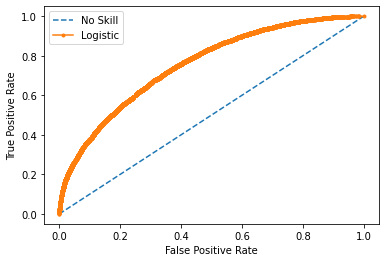

In [ ]:
from matplotlib import pyplot

pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
import numpy as np
gmeans = np.sqrt(tpr * (1-fpr))

ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.396627, G-Mean=0.683


In [ ]:
from sklearn.metrics import classification_report
adjusted_y_pred_lstm=y_pred_lstm
for i in adjusted_y_pred_lstm:
  if(i[0]<=0.4):
    i[0]=0
  else:
    i[0]=1
  
  if(i[1]<=0.4):
    i[1]=0
  else:
    i[1]=1

print(classification_report(lstm_y_test,adjusted_y_pred_lstm))


              precision    recall  f1-score   support

           0       0.67      0.91      0.77       557
           1       0.53      0.60      0.56       343

   micro avg       0.62      0.79      0.70       900
   macro avg       0.60      0.76      0.67       900
weighted avg       0.62      0.79      0.69       900
 samples avg       0.66      0.79      0.70       900



### MODEL 002: Embeddings+SVO

Deep learning forward layers

In [ ]:
import keras
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras import Sequential,Model
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers import Dropout
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Input,add

inputs1 = Input(shape=(768,))
fe1 = Dropout(0.2)(inputs1)
fe2 = Dense(256, activation='gelu')(fe1)


inputs2 = Input(shape=(768,))
se1 = Dropout(0.2)(inputs2)
se2 = Dense(256, activation='gelu')(se1)


concatenate = add([fe2, se2])
forward_layer = Dense(128, activation='gelu')(concatenate)
outputs = Dense(2,activation='softmax')(forward_layer)

# merge the two input models
model_embedding_svo = Model(inputs=[inputs1, inputs2], outputs=outputs)
model_embedding_svo.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['AUC'])
print(model_embedding.summary())


Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 768)]             0         
                                                                 
 dropout_13 (Dropout)        (None, 768)               0         
                                                                 
 dense_31 (Dense)            (None, 256)               196864    
                                                                 
 dense_32 (Dense)            (None, 128)               32896     
                                                                 
 dense_33 (Dense)            (None, 2)                 258       
                                                                 
Total params: 230,018
Trainable params: 230,018
Non-trainable params: 0
_________________________________________________________________
None


Fetching X and Y separately

In [ ]:
X=pd.DataFrame(filtered_df2[column_list_embedding+column_list_svo])

Y=filtered_df2['rating']

y=pd.get_dummies(Y)

In [ ]:
from sklearn.model_selection import train_test_split
lstm_X_train,lstm_X_rem,lstm_y_train,lstm_y_rem = train_test_split(X,y,test_size=0.3,random_state=7)
lstm_X_cv,lstm_X_test,lstm_y_cv,lstm_y_test = train_test_split(lstm_X_rem,lstm_y_rem,test_size=0.1,random_state=7)

In [ ]:
print(lstm_X_train.shape)
print(lstm_X_cv.shape)
print(lstm_X_test.shape)
print(lstm_y_train.shape)
print(lstm_y_cv.shape)
print(lstm_y_test.shape)

(21000, 1536)
(8100, 1536)
(900, 1536)
(21000, 2)
(8100, 2)
(900, 2)


In [ ]:
model_embedding_svo.fit([lstm_X_train[column_list_embedding],lstm_X_train[column_list_svo]],lstm_y_train, batch_size=256, epochs=10,validation_data=([lstm_X_cv[column_list_embedding],lstm_X_cv[column_list_svo]], lstm_y_cv),verbose="auto")

Epoch 1/10
83/83 [==============================] - 3s 20ms/step - loss: 0.6284 - auc: 0.7023 - val_loss: 0.6143 - val_auc: 0.7211
Epoch 2/10
83/83 [==============================] - 1s 10ms/step - loss: 0.6089 - auc: 0.7280 - val_loss: 0.6143 - val_auc: 0.7205
Epoch 3/10
83/83 [==============================] - 1s 10ms/step - loss: 0.6029 - auc: 0.7352 - val_loss: 0.6078 - val_auc: 0.7279
Epoch 4/10
83/83 [==============================] - 1s 10ms/step - loss: 0.5990 - auc: 0.7386 - val_loss: 0.6067 - val_auc: 0.7296
Epoch 5/10
83/83 [==============================] - 1s 10ms/step - loss: 0.5956 - auc: 0.7422 - val_loss: 0.6059 - val_auc: 0.7307
Epoch 6/10
83/83 [==============================] - 1s 10ms/step - loss: 0.5945 - auc: 0.7441 - val_loss: 0.6058 - val_auc: 0.7306
Epoch 7/10
83/83 [==============================] - 1s 11ms/step - loss: 0.5912 - auc: 0.7469 - val_loss: 0.6068 - val_auc: 0.7308
Epoch 8/10
83/83 [==============================] - 1s 10ms/step - loss: 0.5905 - a

In [ ]:
score=model_embedding_svo.evaluate([lstm_X_test[column_list_embedding],lstm_X_test[column_list_svo]],lstm_y_test)

29/29 [==============================] - 0s 5ms/step - loss: 0.6008 - auc: 0.7441


In [ ]:
y_pred_lstm=model_embedding_svo.predict([lstm_X_test[column_list_embedding],lstm_X_test[column_list_svo]])

Handling imbalanced data: Adjusting threshold by finding optimal threshold value of separability, by analysing auc-roc curve

In [ ]:
y_train_pred_lstm=model_embedding_svo.predict([lstm_X_train[column_list_embedding],lstm_X_train[column_list_svo]])

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(lstm_y_train[1],y_train_pred_lstm[:,1])

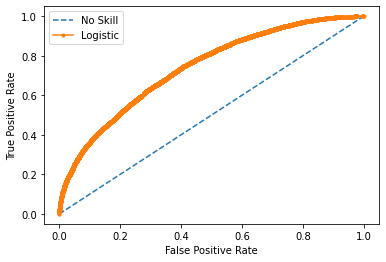

In [ ]:
from matplotlib import pyplot

pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
import numpy as np
gmeans = np.sqrt(tpr * (1-fpr))

ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.369966, G-Mean=0.668


In [ ]:
from sklearn.metrics import classification_report
adjusted_y_pred_lstm=y_pred_lstm
for i in adjusted_y_pred_lstm:
  if(i[0]<=0.37):
    i[0]=0
  else:
    i[0]=1
  
  if(i[1]<=0.37):
    i[1]=0
  else:
    i[1]=1

print(classification_report(lstm_y_test,adjusted_y_pred_lstm))


              precision    recall  f1-score   support

           0       0.66      0.96      0.78       557
           1       0.52      0.64      0.58       343

   micro avg       0.61      0.84      0.71       900
   macro avg       0.59      0.80      0.68       900
weighted avg       0.61      0.84      0.70       900
 samples avg       0.65      0.84      0.72       900



Inference: 

Upon adding SVO, the recall and f1 scores of both class of data have gone up. The loss dipped by 1%.  

